In [2]:
# Random Forest Algorithm
# seeding the generated number makes our results reproducible (good for debugging)
# This module implements pseudo-random number generators for various distributions.
from csv import reader
from datetime import datetime
from math import sqrt
from matplotlib import pyplot
from random import randrange
from random import seed
from sklearn import metrics

from sklearn import preprocessing
from sklearn import svm, datasets
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import itertools
import matplotlib.pyplot as plt
import numpy as np
import numpy as npX
import pandas as pd
import seaborn as sns

import time

#different models to compare:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC




In [5]:
df = pd.read_csv("selected.csv")
#df1 = df.set_index('timestamp')
df.describe()

,Unnamed: 0,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
count,281.000000,2.810000e+02,281.000000,281.000000,281.000000,281.000000,2.810000e+02,281.000000,281.000000,2.810000e+02,2.810000e+02,2.810000e+02
mean,140.000000,1.157416e+18,95.587189,434.982206,167.402135,910.640569,2.031941e+06,25224.306050,11138.932384,4.540502e+15,7.523961e+15,5.752740e+15
std,81.261922,8.076043e+14,95.163921,173.980961,116.628279,545.898619,1.438755e+07,52049.687912,60502.726434,6.757477e+15,6.874819e+15,6.964256e+15
min,0.000000,1.155679e+18,10.000000,60.000000,50.000000,280.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,70.000000,1.156849e+18,30.000000,290.000000,100.000000,620.000000,1.530000e+03,1280.000000,30.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,140.000000,1.157304e+18,60.000000,470.000000,120.000000,690.000000,9.410000e+03,8450.000000,150.000000,1.000000e+02,1.111000e+16,1.250000e+02
75%,210.000000,1.158115e+18,110.000000,570.000000,170.000000,870.000000,4.050000e+04,27240.000000,1340.000000,1.111000e+16,1.111000e+16,1.111000e+16
max,280.000000,1.158759e+18,440.000000,740.000000,600.000000,2850.000000,1.445414e+08,441340.000000,566730.000000,2.222000e+16,2.222000e+16,2.222000e+16


### Preparing Data For Training

In [6]:
X = df[['tweet_length', 'dict_f_measure','negative_sentiment','userFriendsCount']]
y = df['tweet_id']

#X = df.iloc[:, 1:4].values
#y = df.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scale

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the Regression Algorithm

In [8]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### Evaluating the Algorithm

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 405200545911053.5
Mean Squared Error: 3.441114470456596e+29
Root Mean Squared Error: 586610132068701.6


### Training the Classification Algorithm

In [10]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.0
                        precision    recall  f1-score   support

1.1558473460282573e+18       0.00      0.00      0.00       0.0
1.1558784150792888e+18       0.00      0.00      0.00       1.0
 1.155903304171266e+18       0.00      0.00      0.00       1.0
1.1559418467799777e+18       0.00      0.00      0.00       1.0
  1.15597358843383e+18       0.00      0.00      0.00       0.0
 1.156040550467813e+18       0.00      0.00      0.00       0.0
1.1561415379962263e+18       0.00      0.00      0.00       1.0
1.1561424838663045e+18       0.00      0.00      0.00       0.0
 1.156247752847659e+18       0.00      0.00      0.00       1.0
 1.156287351984988e+18       0.00      0.00      0.00       1.0
 1.156327305708544e+18       0.00      0.00      0.00       1.0
  1.15654756361882e+18       0.00      0.00      0.00       0.0
1.1565741419333263e+18       0.00      0.00      0.00       0.0
1.1566035828814356e+18       0.00      0.00      0.00       0.0
 1.156625833261511e+18       0.00  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


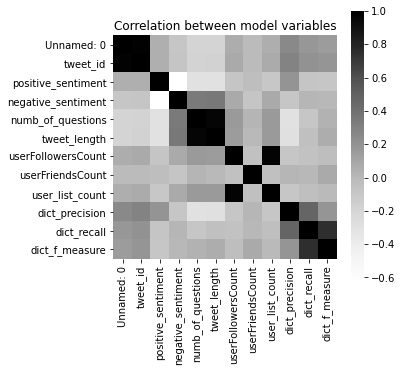

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1, square=True,cmap="Greys");
ax.set_title('Correlation between model variables')
plt.show()

In [15]:
df_acc = pd.DataFrame(columns = ['model','train_accuracy','test_accuracy','time'])

#models to try:
models = [LinearDiscriminantAnalysis,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier,
          RandomForestClassifier,MLPClassifier,LogisticRegression,LinearSVC]
model_names = ['LDA','DecisionTree','GaussNaiveBayes','KNN','RandomForest','MLP','LogReg','LinSVC']

#notes: for KNN, could tweak n_neighbors. 

for model, model_name in zip(models,model_names):
    df_acc = get_accuracy(model,model_name,df_acc,X_train, y_train,X_test,y_test)
    
df_acc

ValueError: The number of samples must be more than the number of classes.

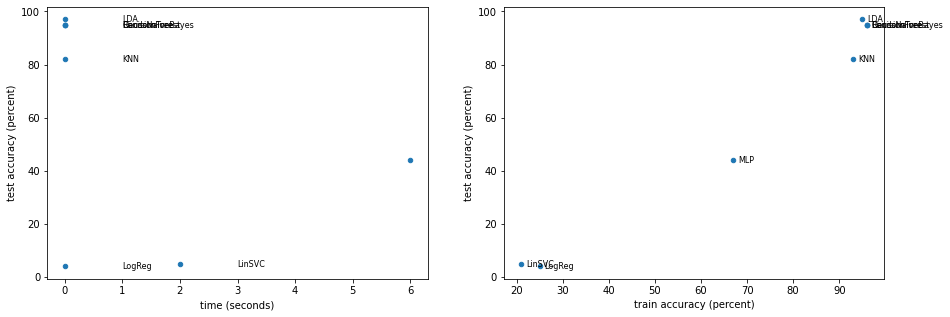

In [94]:
def scatterp(df_plot,x,y,ax,xlabel,ylabel,title):
    df_plot.plot.scatter(x,y,ax = ax)
    for i, txt in enumerate(df_plot.model):
        ax.annotate(txt, (df_plot[x].iat[i]+1,df_plot[y].iat[i]-1),fontsize = 8)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def make_scatter(df_plot):
    df_plot[df_plot.columns[df_plot.columns != 'model']] = df_plot[df_plot.columns[df_plot.columns != 'model']].astype(int)
    fig, axes = plt.subplots(1,2,figsize = [15,5])

    # plot time vs test accuracy 
    scatterp(df_plot=df_acc,x='time',y='test_accuracy',ax=axes[0],xlabel='time (seconds)',
             ylabel='test accuracy (percent)',title = 'Speed-accuracy trade-off: Test accuracy vs. time')

    #plot train vs. test accuracy 
    scatterp(df_plot=df_acc,x='train_accuracy',y='test_accuracy',ax=axes[1],xlabel='train accuracy (percent)',
             ylabel='test accuracy (percent)',title = 'Are we overfitting? Test accuracy vs. Train accuracy')


make_scatter(df_plot=df_acc)

In [14]:
def get_accuracy(model,model_name,df_acc,X_train, y_train,X_test,y_test):
    now = time.time()
    mdl = model()
    mdl.fit(X_train, y_train)
    preds_test = mdl.predict(X_test)
    preds_train = mdl.predict(X_train)
    #add to next row:
    nr = len(df_acc)
    df_acc.loc[nr,'model'] = model_name
    df_acc.loc[nr,'test_accuracy'] = int(accuracy_score(y_test,preds_test)*100) #multiply by 100 for rough plotting
    df_acc.loc[nr,'train_accuracy'] = int(accuracy_score(y_train,preds_train)*100)
    df_acc.loc[nr,'time'] = int(time.time()-now)
    return df_acc

# x

In [6]:
X = df[['userFollowersCount', 'dict_f_measure']]
y = df['tweet_id']

In [7]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Split the dataset into 'Train' and 'Test' sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1074, 2)
X_test shape: (359, 2)
y_train shape: (1074,)
y_test shape: (359,)


### Define and train the model

In [8]:
clf = RandomForestClassifier(max_features=2, random_state=0).fit(X_train, y_train)

In [9]:
print('Accuracy of RF classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on testing set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.95
Accuracy of RF classifier on testing set: 0.93


In [10]:
# Accuracy of RF classifier on training set: 0.39
# Accuracy of RF classifier on testing set: 0.20

# github.com/paulgureghian/Random_Forests

In [11]:
# clf.fit(X, y)
# print(clf.predict([[0, 0,]]))
# clf.feature_importances_
# df.describe()

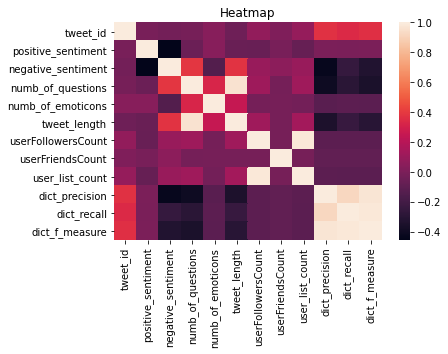

In [12]:
sns.heatmap(df.corr())
plt.title('Heatmap')
plt.savefig('heatmap.png')

Text(0.5, 1.0, 'Boxplot')

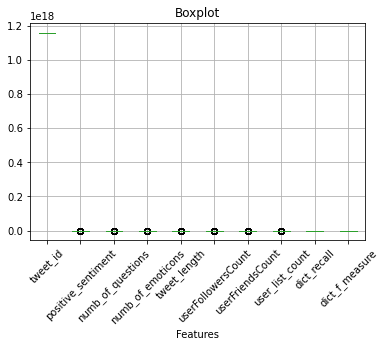

In [13]:
df_box = df.drop(['negative_sentiment', 'dict_precision'], axis=1)
df_box.boxplot()
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.title('Boxplot')

In [14]:
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

ValueError: Found input variables with inconsistent numbers of samples: [1146, 1074]

In [ ]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
# github.com/KalenWillits/RandomForest
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Confusion Matrix

Plotting a confusion matrix allows us to discern whether the system is mislabelling a class

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names=['userFollowersCount', 'dict_f_measure'] # name  of classes

In [ ]:
import numpy as np


def plot_the_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    print('Confusion matrix, without normalization')
    print(cm)
    
    print("Normalized confusion matrix")
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)    

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
# Plot non-normalized confusion matrix
plt.figure()
plot_the_confusion_matrix(cnf_matrix, target_names=class_names,title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, target_names=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

In [ ]:
'''
Trees: 1
Scores: [44.40559440559441, 39.86013986013986, 39.51048951048951, 41.95804195804196, 44.05594405594406]
Mean Accuracy: 41.958%
Trees: 5
Scores: [46.50349650349651, 39.51048951048951, 42.30769230769231, 47.2027972027972, 38.46153846153847]
Mean Accuracy: 42.797%
'''

## Helper Methods

In [ ]:
# Load a CSV file
def load_csv(filename):
    #init the dataset as a list
	dataset = list()
    #open it as a readable file
	with open(filename, 'r') as file:
        #init the csv reader
		csv_reader = reader(file)
        #for every row in the dataset
		for row in csv_reader:
			if not row:
				continue
            #add that row as an element in our dataset list (2D Matrix of values)
			dataset.append(row)
    #return in-memory data matrix
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    #iterate throw all the rows in our data matrix
	for row in dataset:
        #for the given column index, convert all values in that column to floats
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
    #store a given column 
    class_values = [row[column] for row in dataset]
    #create an unordered collection with no duplicates, only unique valeus
    unique = set(class_values)
    #init a lookup table
    lookup = dict()
    #for each element in the column
    for i, value in enumerate(unique):
        #add it to our lookup table
        lookup[value] = i
    #the lookup table stores pointers to the strings
    for row in dataset:
        row[column] = lookup[row[column]]
    #return the lookup table
    return lookup

In [ ]:
# Split a dataset into k folds
# the original sample is randomly partitioned into k equal sized subsamples. 
#Of the k subsamples, a single subsample is retained as the validation data 
#for testing the model, and the remaining k − 1 subsamples are used as training data. 
#The cross-validation process is then repeated k times (the folds),
#with each of the k subsamples used exactly once as the validation data.
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    #init 2 empty lists for storing split dataubsets
	left, right = list(), list()
    #for every row
	for row in dataset:
        #if the value at that row is less than the given value
		if row[index] < value:
            #add it to list 1
			left.append(row)
		else:
            #else add it list 2 
			right.append(row)
    #return both lists
	return left, right
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
	correct = 0
    #for each actual label
	for i in range(len(actual)):
        #if actual matches predicted label
		if actual[i] == predicted[i]:
            #add 1 to the correct iterator
			correct += 1
    #return percentage of predictions that were correct
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    #folds are the subsamples used to train and validate model
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
    #for each subsample
	for fold in folds:
        #create a copy of the data
		train_set = list(folds)
        #remove the given subsample
		train_set.remove(fold)
		train_set = sum(train_set, [])
        #init a test set
		test_set = list()
        #add each row in a given subsample to the test set
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
        #get predicted labls
		predicted = algorithm(train_set, test_set, *args)
        #get actual labels
		actual = [row[-1] for row in fold]
        #compare accuracy
		accuracy = accuracy_metric(actual, predicted)
        #add it to scores list, for each fold
		scores.append(accuracy)
    #return all accuracy scores
	return scores
 
 
# Calculate the Gini index for a split dataset
# this is the name of the cost function used to evaluate splits in the dataset.
# this is a measure of how often a randomly chosen element from the set 
# would be incorrectly labeled if it was randomly labeled according to the distribution
# of labels in the subset. Can be computed by summing the probability
# of an item with label i being chosen times the probability 
# of a mistake in categorizing that item. 
# It reaches its minimum (zero) when all cases in the node 
# fall into a single target category.
# A split in the dataset involves one input attribute and one value for that attribute. 
# It can be used to divide training patterns into two groups of rows.
# A Gini score gives an idea of how good a split is by how mixed the classes 
# are in the two groups created by the split. A perfect separation results in 
# a Gini score of 0, whereas the worst case split that results in 50/50 classes 
#in each group results in a Gini score of 1.0 (for a 2 class problem).
#We first need to calculate the proportion of classes in each group.
def gini_index(groups, class_values):
	gini = 0.0
    #for each class
	for class_value in class_values:
        #a random subset of that class
		for group in groups:
			size = len(group)
			if size == 0:
				continue
            #average of all class values
			proportion = [row[-1] for row in group].count(class_value) / float(size)
            #  sum all (p * 1-p) values, this is gini index
			gini += (proportion * (1.0 - proportion))
	return gini
 
# Select the best split point for a dataset
#This is an exhaustive and greedy algorithm
def get_split(dataset, n_features):
    ##Given a dataset, we must check every value on each attribute as a candidate split, 
    #evaluate the cost of the split and find the best possible split we could make.
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	features = list()
	while len(features) < n_features:
		index = randrange(len(dataset[0])-1)
		if index not in features:
			features.append(index)
	for index in features:
		for row in dataset:
            ##When selecting the best split and using it as a new node for the tree 
            #we will store the index of the chosen attribute, the value of that attribute 
            #by which to split and the two groups of data split by the chosen split point.
            ##Each group of data is its own small dataset of just those rows assigned to the 
            #left or right group by the splitting process. You can imagine how we might split 
            #each group again, recursively as we build out our decision tree.
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    ##Once the best split is found, we can use it as a node in our decision tree.
    ##We will use a dictionary to represent a node in the decision tree as 
    #we can store data by name. 
	return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value

def to_terminal(group):
    #select a class value for a group of rows. 
	outcomes = [row[-1] for row in group]
    #returns the most common output value in a list of rows.
	return max(set(outcomes), key=outcomes.count)
 
#Create child splits for a node or make terminal
#Building a decision tree involves calling the above developed get_split() function over 
#and over again on the groups created for each node.
#New nodes added to an existing node are called child nodes. 
#A node may have zero children (a terminal node), one child (one side makes a prediction directly) 
#or two child nodes. We will refer to the child nodes as left and right in the dictionary representation 
#of a given node.
#Once a node is created, we can create child nodes recursively on each group of data from 
#the split by calling the same function again.
def split(node, max_depth, min_size, n_features, depth):
    #Firstly, the two groups of data split by the node are extracted for use and 
    #deleted from the node. As we work on these groups the node no longer requires access to these data.
	left, right = node['groups']
	del(node['groups'])
    
    #Next, we check if either left or right group of rows is empty and if so we create 
    #a terminal node using what records we do have.
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
    #We then check if we have reached our maximum depth and if so we create a terminal node.
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
    #We then process the left child, creating a terminal node if the group of rows is too small, 
    #otherwise creating and adding the left node in a depth first fashion until the bottom of 
    #the tree is reached on this branch.
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left, n_features)
		split(node['left'], max_depth, min_size, n_features, depth+1)
	# process right child
    #The right side is then processed in the same manner, 
    #as we rise back up the constructed tree to the root.
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right, n_features)
		split(node['right'], max_depth, min_size, n_features, depth+1)
 
#Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
    #Building the tree involves creating the root node and 
	root = get_split(train, n_features)
    #calling the split() function that then calls itself recursively to build out the whole tree.
	split(root, max_depth, min_size, n_features, 1)
	return root
 
# Make a prediction with a decision tree
def predict(node, row):
    #Making predictions with a decision tree involves navigating the 
    #tree with the specifically provided row of data.
    #Again, we can implement this using a recursive function, where the same prediction routine is 
    #called again with the left or the right child nodes, depending on how the split affects the provided data.
    #We must check if a child node is either a terminal value to be returned as the prediction
    #, or if it is a dictionary node containing another level of the tree to be considered.
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']
 
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
	sample = list()
	n_sample = round(len(dataset) * ratio)
	while len(sample) < n_sample:
		index = randrange(len(dataset))
		sample.append(dataset[index])
	return sample

In [ ]:
# Make a prediction with a list of bagged trees
#responsible for making a prediction with each decision tree and 
#combining the predictions into a single return value. 
#This is achieved by selecting the most common prediction 
#from the list of predictions made by the bagged trees.
def bagging_predict(trees, row):
	predictions = [predict(tree, row) for tree in trees]
	return max(set(predictions), key=predictions.count)
 
# Random Forest Algorithm
#esponsible for creating the samples of the training dataset, training a decision tree on each,
#then making predictions on the test dataset using the list of bagged trees.
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
	trees = list()
	for i in range(n_trees):
		sample = subsample(train, sample_size)
		tree = build_tree(sample, max_depth, min_size, n_features)
		trees.append(tree)
	predictions = [bagging_predict(trees, row) for row in test]
	return(predictions)
def random_1():
    # Test the random forest algorithm
    seed(1)
    # load and prepare data
    filename = 'feature_vec.csv'
    dataset = load_csv(filename)
    dataset.pop(0)
    #print(dataset)
    # convert string attributes to integers
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)

    # convert class column to integers
    str_column_to_int(dataset, len(dataset[0])-1)

    # evaluate algorithm
    n_folds = 5
    max_depth = 10
    min_size = 1
    sample_size = 1.0
    n_features = int(sqrt(len(dataset[0])-1))
    for n_trees in [1, 5, 10]:
        scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
        print('Trees: %d' % n_trees)
        print('Scores: %s' % scores)
        print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
        
# random_1()